In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

**Download Datasets**

In [ ]:
# Voice measuement Dataset
df1 = pd.read_csv("/content/drive/MyDrive/Mile Stone 2/Dataset/parkinsons.data")

# Read your five mjf dataframes

mjf1 = pd.read_csv("/content/drive/MyDrive/Mile Stone 2/Dataset/MDS/MDS-UPDRS_Part_I_Patient_Questionnaire_11Sep2024.csv")
mjf2 = pd.read_csv("/content/drive/MyDrive/Mile Stone 2/Dataset/MDS/MDS_UPDRS_Part_II__Patient_Questionnaire_11Sep2024.csv")
mjf3 = pd.read_csv("/content/drive/MyDrive/Mile Stone 2/Dataset/MDS/MDS-UPDRS_Part_III_11Sep2024.csv")

# Demographic and status
demo = pd.read_csv("/content/drive/MyDrive/Mile Stone 2/Dataset/Demographic/Demographics_17Sep2024.csv")
status = pd.read_csv("/content/drive/MyDrive/Mile Stone 2/Dataset/Demographic/Participant_Status_17Sep2024.csv")

# Datadict
data_dict = pd.read_csv("/content/drive/MyDrive/Mile Stone 2/Dataset/MDS/ppmi_data_dictionary_merge.csv")

In [ ]:
# Concatenate the dataframes along the column axis (axis=1)
concatenated_df = pd.concat([mjf1, mjf2, mjf3], axis=1)

# Remove duplicate 'PATNO', 'REC_ID', 'EVENT_ID' columns if they exist
concatenated_df = concatenated_df.loc[:,~concatenated_df.columns.duplicated()]

# List of columns to retain
columns_to_keep = ['PATNO', 'REC_ID', 'EVENT_ID',
                   'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG',
                   'NP2SPCH', 'NP2SALV', 'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT',
                   'NP2HOBB', 'NP2TURN', 'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ',
                   'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL',
                   'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR',
                   'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL',
                   'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR', 'NP3KTRML',
                   'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON']

# Filter the dataframe to include only the specified columns
final_df = concatenated_df[columns_to_keep]

In [ ]:
final_df = final_df.dropna()

# Define the list of event IDs you want to keep (up to V10)
valid_event_ids = ["BL", "V04", "V06", "V10"]

# Filter the dataframe to keep only rows where 'EVENT_ID' is in the valid_event_ids
filtered_until_v10_df = final_df[final_df['EVENT_ID'].isin(valid_event_ids)]

# Save the filtered dataframe to a new CSV file
filtered_until_v10_df.to_csv("filtered_parkinson_patients_until_v10.csv", index=False)

# Confirm the file is saved
print("File saved as 'filtered_parkinson_patients_until_v10.csv'")

File saved as 'filtered_parkinson_patients_until_v10.csv'


In [ ]:
filtered_until_v10_df

,PATNO,REC_ID,EVENT_ID,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,NP3FTAPR,NP3FTAPL,NP3HMOVR,NP3HMOVL,NP3PRSPR,NP3PRSPL,NP3TTAPR,NP3TTAPL,NP3LGAGR,NP3LGAGL,NP3RISNG,NP3GAIT,NP3FRZGT,NP3PSTBL,NP3POSTR,NP3BRADY,NP3PTRMR,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON
0,3000.0,272451501,BL,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3000.0,338702301,V04,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000.0,385009201,V06,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3000.0,512466901,V10,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3001.0,278741601,BL,1.0,2.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010,366908.0,IA569760,BL,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25011,367125.0,IA558758,BL,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,101.0,101.0,101.0,101.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,101.0,0.0,0.0
25012,370299.0,IA561284,BL,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,101.0,101.0,101.0,101.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,0.0,0.0,0.0,101.0,101.0,0.0,0.0,101.0,101.0,101.0,0.0
25013,373975.0,IA557325,BL,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
df_cleaned = filtered_until_v10_df[(filtered_until_v10_df != 101).all(axis=1)]
df_cleaned

,PATNO,REC_ID,EVENT_ID,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,NP3FTAPR,NP3FTAPL,NP3HMOVR,NP3HMOVL,NP3PRSPR,NP3PRSPL,NP3TTAPR,NP3TTAPL,NP3LGAGR,NP3LGAGL,NP3RISNG,NP3GAIT,NP3FRZGT,NP3PSTBL,NP3POSTR,NP3BRADY,NP3PTRMR,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON
0,3000.0,272451501,BL,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3000.0,338702301,V04,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000.0,385009201,V06,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3000.0,512466901,V10,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3001.0,278741601,BL,1.0,2.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25008,363157.0,IA543221,BL,3.0,2.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25009,366799.0,IA553764,BL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,2.0,2.0,1.0,2.0,1.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,0.0,2.0,1.0,3.0,3.0,2.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,4.0
25010,366908.0,IA569760,BL,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25013,373975.0,IA557325,BL,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# First, select the columns of interest from demo and status
demo_selected = demo[['PATNO', 'SEX']]
status_selected = status[['PATNO', 'COHORT_DEFINITION']]

# Step 1: Merge demo with df_cleaned on PATNO
merged_df = pd.merge(df_cleaned, demo_selected, on='PATNO', how='inner')

# Step 2: Merge the result with status on PATNO
final_df = pd.merge(merged_df, status_selected, on='PATNO', how='inner')

# Display the final dataframe
final_df.head()

# Save the final dataframe
final_df.to_csv("merged_parkinson_data.csv", index=False)

# Confirm the file is saved
print("File saved as 'merged_parkinson_data.csv'")

File saved as 'merged_parkinson_data.csv'


In [ ]:
final_df

,PATNO,REC_ID,EVENT_ID,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,NP3FTAPR,NP3FTAPL,NP3HMOVR,NP3HMOVL,NP3PRSPR,NP3PRSPL,NP3TTAPR,NP3TTAPL,NP3LGAGR,NP3LGAGL,NP3RISNG,NP3GAIT,NP3FRZGT,NP3PSTBL,NP3POSTR,NP3BRADY,NP3PTRMR,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,SEX,COHORT_DEFINITION
0,3000.0,272451501,BL,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Healthy Control
1,3000.0,338702301,V04,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Healthy Control
2,3000.0,385009201,V06,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Healthy Control
3,3000.0,512466901,V10,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Healthy Control
4,3001.0,278741601,BL,1.0,2.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Parkinson's Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6937,363157.0,IA543221,BL,3.0,2.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Prodromal
6938,366799.0,IA553764,BL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,2.0,2.0,1.0,2.0,1.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,0.0,2.0,1.0,3.0,3.0,2.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,4.0,1,Prodromal
6939,366908.0,IA569760,BL,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Prodromal
6940,373975.0,IA557325,BL,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,Prodromal


In [ ]:
# Step 1: Create a dictionary to map ITM_NAME to DSCR
column_mapping = dict(zip(data_dict['ITM_NAME'], data_dict['DSCR']))

# Step 2: Rename columns in final_df based on the mapping
final_df_renamed = final_df.rename(columns=column_mapping)
final_df_renamed.to_csv("final_df_renamed.csv", index=False)

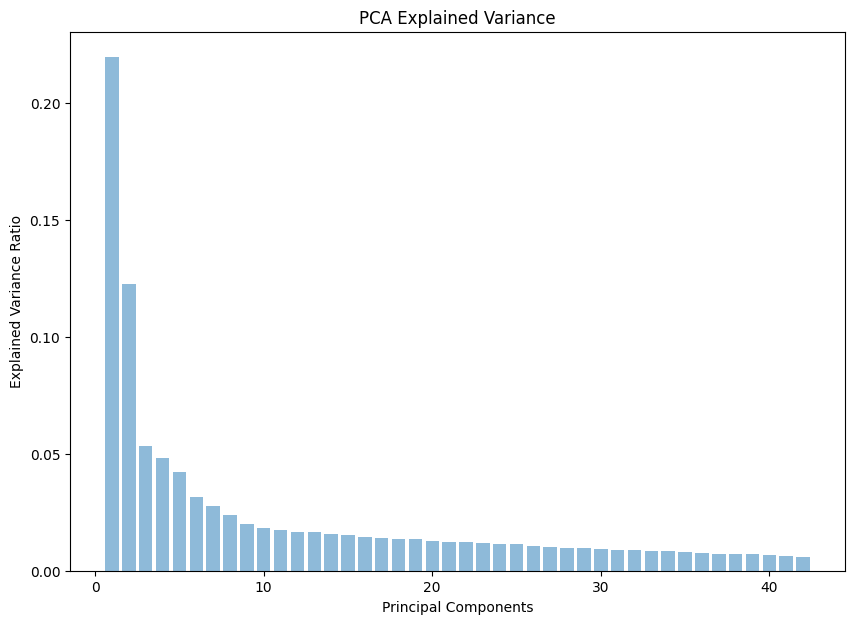

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
SLEEP PROBLEMS (NIGHT),-0.008313,0.102198,0.014687,0.025035,0.397284,0.010275,0.028439,-0.015213,-0.066268,-0.035333,-0.251665,0.072806,-0.207913,0.022805,-0.312496,-0.027135,0.059598,-0.033378,-0.337274,0.158501,0.321677,-0.007542,-0.070031,0.470991,-0.346611,-0.022992,-0.017073,0.087823,0.002041,0.020348,-0.022867,-0.053135,0.045606,-0.032457,-0.011533,-0.028183,0.001483,0.009334,0.038376,0.002135,-0.012942,-0.019220
DAYTIME SLEEPINESS,0.000177,0.132710,0.038812,0.033493,0.373504,-0.004309,-0.004398,-0.011519,0.086162,0.061007,-0.093525,0.159361,-0.262008,-0.095269,0.201288,-0.266315,0.146373,0.394921,-0.125779,0.151509,-0.034415,0.192015,-0.087880,-0.253557,0.252605,0.036206,-0.266877,-0.294844,0.078502,-0.145555,0.020358,0.057529,-0.073559,0.045070,0.095300,0.008572,-0.054182,0.043414,-0.017008,-0.030988,0.019082,0.009376
PAIN AND OTHER SENSATIONS,0.002999,0.127764,-0.002583,0.020786,0.361461,-0.020708,0.024095,0.005986,-0.109766,-0.076508,-0.268431,-0.051138,-0.026616,0.110547,-0.320334,0.280074,-0.073195,-0.387589,0.196051,-0.341158,-0.142190,-0.038197,0.179166,-0.169894,0.143697,0.045744,-0.197428,-0.295427,-0.025776,-0.065459,0.020057,0.015127,-0.043995,0.045882,0.074658,0.037961,-0.066896,-0.009855,0.001878,0.019443,0.009429,-0.003663
URINARY PROBLEMS,0.001021,0.141225,0.033097,0.004467,0.281968,-0.010628,-0.000428,0.025227,-0.024524,0.018181,0.257168,-0.137717,0.419341,-0.103293,-0.309592,-0.311099,0.044691,0.278066,0.500571,0.090467,0.030386,0.035324,0.175075,0.044216,-0.219290,0.031877,-0.034499,-0.006751,-0.028410,-0.020732,-0.014301,0.024216,0.026270,-0.035446,-0.027535,0.031446,0.008363,0.013114,-0.022835,-0.042257,0.003304,-0.015422
CONSTIPATION PROBLEMS,-0.005331,0.128983,0.000718,0.016538,0.285854,-0.002502,0.015956,-0.001963,0.096881,0.052698,0.283752,-0.244275,0.509546,0.176569,0.094189,-0.043952,-0.091981,-0.316978,-0.480442,0.160228,0.011596,0.091404,-0.135035,-0.092516,0.180022,0.017526,0.003649,-0.029529,0.049409,-0.009741,0.008601,-0.052321,-0.030029,-0.036490,-0.038365,-0.028326,0.024398,-0.010200,0.019478,0.001192,-0.029677,0.018488
LIGHTHEADEDNESS ON STANDING,0.002807,0.140578,0.020889,0.032603,0.309651,-0.020492,0.024198,-0.032619,0.008831,0.011378,0.289304,0.024653,-0.045689,-0.060637,0.596046,0.326785,-0.103719,0.021148,0.156468,-0.140317,-0.115697,-0.186573,-0.001948,0.326201,-0.254944,-0.114983,-0.091671,-0.058978,0.000451,-0.102199,0.058622,0.027792,0.013961,0.024874,0.068433,-0.038365,-0.038870,-0.016637,0.013241,0.043928,0.012735,0.006146
FATIGUE,0.001415,0.166485,0.031641,0.016167,0.405788,-0.014121,0.005387,-0.014865,0.003468,-0.001415,-0.130610,0.056026,-0.084261,-0.008641,0.134476,0.043174,-0.023128,0.103118,0.084242,-0.171752,0.038913,0.035502,0.026578,-0.259190,0.183499,-0.048090,0.533504,0.449455,-0.097932,0.266829,-0.045297,-0.039235,0.074905,-0.063020,-0.140048,0.010596,0.039875,-0.012877,-0.026826,0.000474,-0.002063,-0.001182
SPEECH,0.012286,0.264320,0.002257,0.000137,-0.081589,0.020513,-0.019925,0.002790,0.148004,0.127673,0.234952,0.068962,-0.137655,0.016498,-0.021032,0.011251,0.071747,-0.041897,-0.025016,-0.155431,0.122840,0.060766,0.091555,-0.022679,-0.110080,0.583532,-0.047254,0.068750,-0.041797,0.215422,0.003208,-0.310491,-0.329185,0.329273,0.083665,-0.100434,0.018691,0.049817,-0.007519,0.049183,0.005606,0.004875
SALIVA + DROOLING,0.010339,0.204179,0.000493,-0.004999,-0.037427,-0.014443,-0.019555,-0.012575,0.251614,0.259579,0.264187,0.146586,-0.209063,-0.125963,-0.171611,-0.373622,0.250030,-0.314737,-0.042214,-0.343698,-0.219606,-0.094152,-0.099027,0.099269,0.017314,-0.293208,0.056399,0.025542,0.159001,-0.004514,0.024464,0.088163,0.080895,-0.086698,-0.006622,0.003504,0.026801,-0.007245,-0.006049,-0.068347,0.017350,-0.008989
CHEWING AND SWALLOWING,0.000381,0.193668,0.006255,-0.00

In [ ]:
# Step 1: Preprocessing the data
# Select only numeric columns for PCA
numeric_df = final_df_renamed.select_dtypes(include=['float64', 'int64'])
# Remove identifier columns ()
numeric_df = numeric_df.drop(columns=['Participant ID','Sex of participant at birth'], errors='ignore')

# Handle missing values by filling them (you can choose to drop rows/columns with missing data)
numeric_df = numeric_df.fillna(numeric_df.mean())
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Step 2: Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca_components = pca.fit_transform(scaled_data)

# Step 3: Visualize the explained variance
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance')
plt.show()

# Step 4: Show feature contributions to the principal components
# Loadings: contributions of each original feature to the principal components
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=numeric_df.columns)

# Show the loadings for the first few principal components
loadings

<ipython-input-46-f6a75174c846>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cluster'] = kmeans.labels_


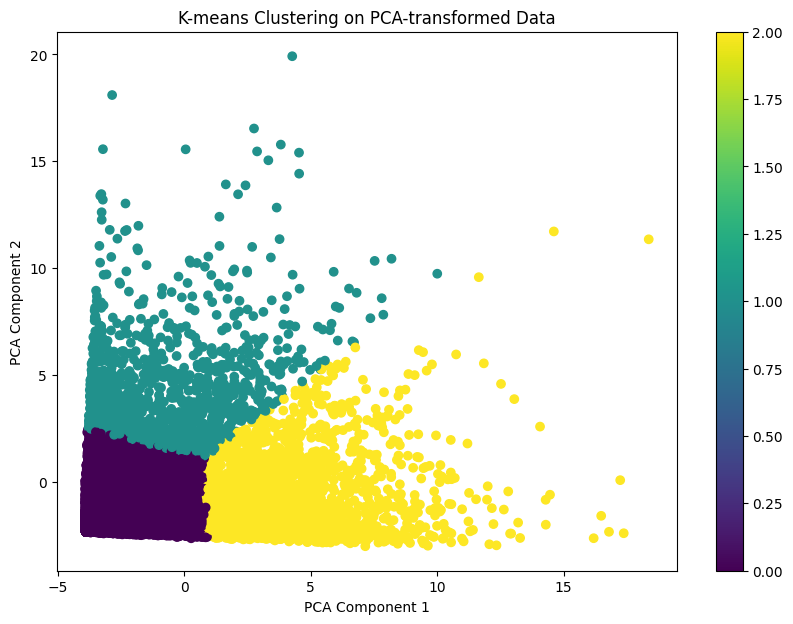

In [ ]:
# Use the first 3 principal components for clustering
pca_3_components = pca_components[:, :3]

# Step 1: Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_3_components)

# Step 2: Add the cluster labels to the dataset
df_cleaned['cluster'] = kmeans.labels_

# Step 3: Visualize the clustering (PCA components)
plt.figure(figsize=(10, 7))
plt.scatter(pca_3_components[:, 0], pca_3_components[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering on PCA-transformed Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()